# XGBoost

In [1]:
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.regression_metrics import regression

In [2]:
train =  pd.read_parquet('../../../data/model_input/train_sets/electricity_transformer.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/electricity_transformer.parquet')

In [3]:
y_train = train.OT_next
X_train = train.drop(columns=['date', 'OT_next'])

In [4]:
y_validation = validation.OT_next
X_validation = validation.drop(columns=['date', 'OT_next'])

In [7]:
exploratory_depths =[2, 3, 4, 5, 6]
exploratory_estimators = [50, 100, 200, 400, 500]
exploratory_learn_rate = [0.05, 0.1, 0.5, 0.7]

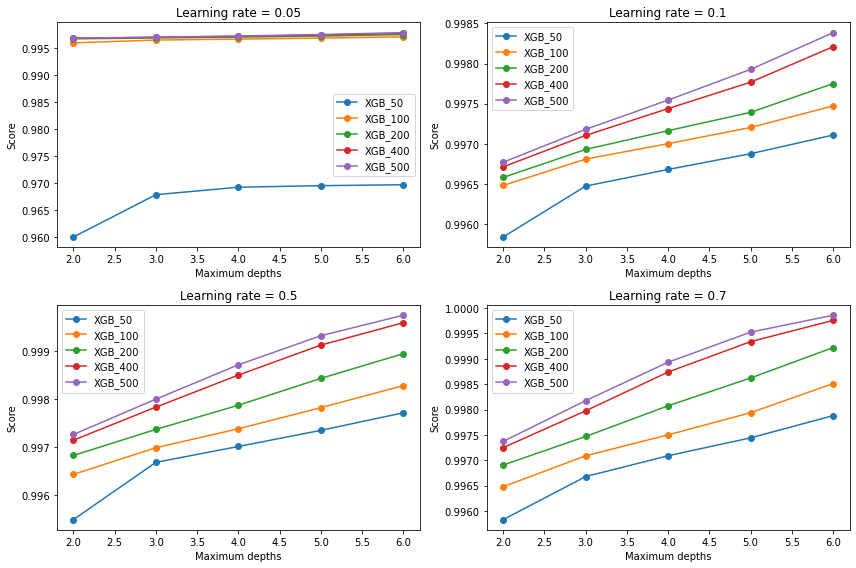

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for n in exploratory_estimators:
    axs[0, 0].plot(exploratory_depths, [XGBRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[0]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    axs[0, 1].plot(exploratory_depths, [XGBRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[1]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    axs[1, 0].plot(exploratory_depths, [XGBRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[2]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    axs[1, 1].plot(exploratory_depths, [XGBRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[3]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    
axs[0, 0].set_title('Learning rate = '+str(exploratory_learn_rate[0]))
axs[0, 0].legend()
axs[0, 0].set_xlabel('Maximum depths')
axs[0, 0].set_ylabel('Score')
axs[0, 1].set_title('Learning rate = '+str(exploratory_learn_rate[1]))
axs[0, 1].legend()
axs[0, 1].set_xlabel('Maximum depths')
axs[0, 1].set_ylabel('Score')
axs[1, 0].set_title('Learning rate = '+str(exploratory_learn_rate[2]))
axs[1, 0].legend()
axs[1, 0].set_xlabel('Maximum depths')
axs[1, 0].set_ylabel('Score')
axs[1, 1].set_title('Learning rate = '+str(exploratory_learn_rate[3]))
axs[1, 1].legend()
axs[1, 1].set_xlabel('Maximum depths')
axs[1, 1].set_ylabel('Score')

plt.tight_layout()
plt.show()

In [9]:
max_depth = [1, 2, 3, 4, 5]
n_estimators = [25, 50, 75, 100, 150, 200, 250, 300, 350, 400, 450, 500]
learn_rate = [0.01, 0.05, 0.1, 0.2, 0.5, 0.7]

In [10]:
models_list = []
names_list = []
for n in n_estimators:
    for d in max_depth:
        for l in learn_rate:
            models_list.append(XGBRegressor(n_estimators=n, max_depth=d, learning_rate=l))
            names_list.append('XGB_'+str(n)+'_'+str(d)+'_'+str(l))

In [11]:
metrics = regression(models_list, names_list, '../../../data/model_output/metrics/electricity_transformer/xgboost.csv', X_train, y_train, X_validation, y_validation, metrics={})
metrics

,Run_Time,Train_RMSE,Validation_RMSE,delta%
XGB_25_1_0.01,0.927353,14.219057,2.356042,-83.430390
XGB_25_1_0.05,0.993897,6.095245,4.444544,-27.081783
XGB_25_1_0.1,1.254686,2.691435,5.100875,89.522498
XGB_25_1_0.2,1.009352,1.146653,2.940164,156.412845
XGB_25_1_0.5,0.847510,1.256733,1.117394,-11.087341
...,...,...,...,...
XGB_500_5_0.05,39.074997,0.417597,0.328522,-21.330500
XGB_500_5_0.1,31.566981,0.380297,0.337493,-11.255397
XGB_500_5_0.2,30.468253,0.321135,0.393385,22.498229
XGB_500_5_0.5,27.134014,0.217671,0.476451,118.885583


In [25]:
metrics.sort_values(by='Validation_RMSE').head(15)

,Run_Time,Train_RMSE,Validation_RMSE,delta%
XGB_400_5_0.01,31.024868,0.566448,0.310168,-45.243315
XGB_450_5_0.01,34.024088,0.501054,0.310504,-38.029929
XGB_75_5_0.05,4.436142,0.604640,0.311578,-48.468813
XGB_500_5_0.01,39.688092,0.472768,0.311885,-34.030157
XGB_100_5_0.05,5.962061,0.469623,0.312647,-33.425966
XGB_50_5_0.1,3.016936,0.466886,0.312956,-32.969653
XGB_150_5_0.05,8.560116,0.446033,0.313300,-29.758435
XGB_75_5_0.1,4.457084,0.447039,0.313393,-29.895891
XGB_100_5_0.1,5.764590,0.441755,0.314573,-28.790151
XGB_350_5_0.01,19.907093,0.710609,0.316528,-55.456765


Let's continue to the next phase with **XGB_100_5_0.05**  because it has very good RMSE in validation, better delta than the better models in RMSE and mainly because its low run time

In [5]:
test =  pd.read_parquet('../../../data/model_input/test_sets/electricity_transformer.parquet')

In [6]:
y_test = test.OT_next
X_test = test.drop(columns=['date', 'OT_next'])

In [7]:
retrain = pd.concat([train, validation])

In [8]:
y_retrain = retrain.OT_next
X_retrain = retrain.drop(columns=['date', 'OT_next'])

In [32]:
model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.05).fit(X_retrain, y_retrain)

In [33]:
test_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, test_pred)
print('Test RMSE:', round(rmse, 4))

Test RMSE: 0.3317


In [34]:
dump(model, '../../../data/model_output/models/electricity_transformer/best_xgboost.joblib')

['best_xgboost.joblib']

In [35]:
with open('../../../data/model_output/metrics/electricity_transformer/final_RMSE.txt', 'a') as f:
    f.write('\nXGB, '+ str(rmse))

C:\Users\MANUEL~2\AppData\Local\Temp/ipykernel_14508/3731660872.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_retrain.min(), y_retrain.max()], [y_retrain.min(), y_retrain.max()],


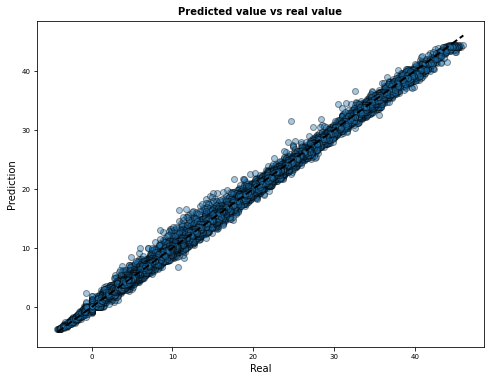

In [36]:
prediction_retrain = model.predict(X_retrain)
error_retrain   = prediction_retrain - y_retrain

plt.figure(figsize=(8, 6))

plt.scatter(y_retrain, prediction_retrain, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_retrain.min(), y_retrain.max()], [y_retrain.min(), y_retrain.max()],
                'k--', color = 'black', lw=2)
plt.title('Predicted value vs real value', fontsize = 10, fontweight = "bold")
plt.xlabel('Real')
plt.ylabel('Prediction')
plt.tick_params(labelsize = 7)

In [9]:
from joblib import load
load_mod = load('../../../data/model_output/models/electricity_transformer/best_xgboost.joblib')

train_pred = load_mod.predict(X_retrain)
rmse_train = root_mean_squared_error(y_retrain, train_pred)
test_pred = load_mod.predict(X_test)
rmse_test = root_mean_squared_error(y_test, test_pred)

In [10]:
import time 
time1 = time.time()
XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.05).fit(X_retrain, y_retrain)
time2 = time.time() - time1 

with open('../../../data/model_output/metrics/electricity_transformer/final_metrics.txt', 'a') as f:
     f.write(f'\nXGB; {time2}; {rmse_train}; {rmse_test}')